In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

In [2]:
# pip install pydot

In [3]:
# conda install graphviz

In [4]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [5]:
model = Sequential()
model.add(keras.layers.Dense(2, input_shape=(2,))) # hidden layer
model.add(keras.layers.Activation('linear'))         # hidden layer ReLU
model.add(keras.layers.Dense(1))                   # Output layer
# model.add(keras.layers.Activation('linear'))       # Output layer linear activation

In [6]:
w1 = np.zeros((2, 2)) # two input neurons for two neurons at the hidden layer
b1 = np.zeros((2,))   # one bias neuron for two neurons in the hidden layer
w2 = np.zeros((2, 1)) # two input neurons for one output neuron
b2 = np.zeros((1,))   # one bias for one output neuron

In [7]:
w1

array([[0., 0.],
       [0., 0.]])

In [8]:
w2

array([[0.],
       [0.]])

In [9]:
w1[:, 0] =  1 # the weights for the first hidden neuron are all 1
b1[0]    =  0 # bias for the first neuron
w1[:, 1] =  2 # the weights for the second hidden neuron are all 2
b1[1]    = -1 # bias for the second neuron
w2[0, 0] =  1 # weight for the first input of the output neuron
w2[1, 0] = -2 # weight for the second input of the output neuron
b2[0]    =  0 # bias for the output neuron

In [10]:
w1

array([[1., 2.],
       [1., 2.]])

In [11]:
w2

array([[ 1.],
       [-2.]])

In [12]:
[w1, b1, w2, b2]

[array([[1., 2.],
        [1., 2.]]),
 array([ 0., -1.]),
 array([[ 1.],
        [-2.]]),
 array([0.])]

In [13]:
model.set_weights([w1, b1, w2, b2])

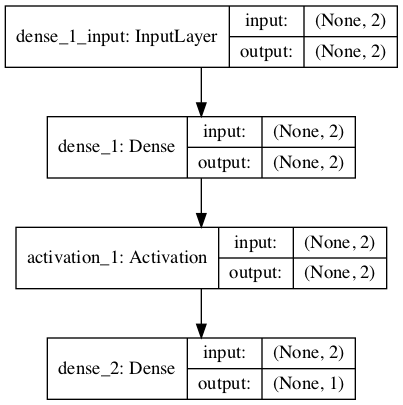

In [14]:
plot_model(model, show_shapes= True, show_layer_names=True)

In [15]:
x = np.array([
[0, 0],
[0, 1],
[1, 0],
[1, 1],
])
model.predict(x)

array([[ 2.],
       [-1.],
       [-1.],
       [-4.]], dtype=float32)

In [16]:
hidden_layers = keras.backend.function(
[model.layers[0].input],  # we will feed the function with the input of the first layer  
[model.layers[0].output,] # we want to get the output of the first layer
)
hidden_layers([x])

[array([[ 0., -1.],
        [ 1.,  1.],
        [ 1.,  1.],
        [ 2.,  3.]], dtype=float32)]

In [17]:
hidden_layers = keras.backend.function(
[model.layers[0].input],  # we will feed the function with the input of the first layer
[model.layers[1].output,] # we want to get the output of the second layer
)
hidden_layers([x])

[array([[ 0., -1.],
        [ 1.,  1.],
        [ 1.,  1.],
        [ 2.,  3.]], dtype=float32)]

In [ ]:
import numpy as np

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [ ]:
def sigmoid_derivate(x):
    return x*(1-x)

In [ ]:
training_inputs = np.array([[0,0,1],
                            [1,1,1],
                            [1,0,1],
                            [0,1,1]])
training_outputs = np.array([[0,1,1,0]]).T

In [ ]:
np.random.seed(1)

In [ ]:
synaptic_weights = 2* np.random.random((3,1)) - 1

In [ ]:
print("random starting synaptic weights")
print(synaptic_weights)

In [ ]:
for iteration in range(20000):
    input_layer = training_inputs
    outputs = sigmoid(np.dot(input_layer, synaptic_weights))
    error = training_outputs - outputs
    adjustments = error * sigmoid_derivate(outputs)
    synaptic_weights += np.dot(input_layer.T, adjustments)

    
print("synaptic weights after training")
print(synaptic_weights)
    
print("Original training outputs")
print(training_outputs)
print("outputs after training")
print(outputs)

In [ ]:
class MLP:
    def __init__(self, num_inputs=2, num_hidden=[3,4], num_outputs = 2):
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs
        
        layers = [self.num_inputs] + self.num_hidden + [self.num_outputs]
         
        weights = [] 
        for i in range(len(layers)-1):
            w = np.random.rand(layers[i], layers[i+1])
            weights.append(w)
        self.weights = weights
        
        activations = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activations.append(a)
        self.activations = activations
        
        derivatives = [] 
        for i in range(len(layers)-1):
            d = np.random.rand(layers[i], layers[i+1])
            derivatives.append(w)
        self.derivatives = derivatives
            
    def forward_propagate(self, inputs):
        activations = inputs  
        
        self.activations[0] = inputs
        
        for i, w in enumerate(self.weights):
            net_inputs = np.dot(activations, w) 
             
            activations = self.sigmoid(net_inputs)
            
            self.activations[i+1] = activations
            
        return activations
    
    def back_propagate(self, error):
        for i in reverse(range(len(self.derivatives))):
            print(i)
        
    def sigmoid(self, x):
        return 1/(1+ np.exp(-x))
    
    
    

In [ ]:
np.random.seed(1)

mlp = MLP() 
inputs = np.random.rand(mlp.num_inputs)
outputs = mlp.forward_propagate(inputs)
print(outputs)


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#dataset import
dataset = pd.read_csv("data/train.csv") #You need to change #directory accordingly
dataset.head()

In [ ]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

In [ ]:
from sklearn.preprocessing import StandardScaler

#Normalizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X

In [ ]:
#One hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [ ]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation ='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

In [ ]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'])
plt.show()